# <center>HACKATHON ENSTA PARIS 19 MARS 2022</center>#
# NAMES: PANONGBENE JEAN MOHAMED SAWADOGO #
# NAMES : SAJJAD MAHDAVI
# NAMES : ACHRAFF ADJILEYE
# NAMES : YANIS FELLAH
# Email: scbas1000@gmail.com 
# Email: amet1900@gmail.com #
# Github: https://github.com/Panongbene #

## IMPORT lIBRARY

In [1]:
import json
import logging
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from nltk.corpus import stopwords
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, confusion_matrix, \
multilabel_confusion_matrix, classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Variable

In [3]:
nameCsvFile = "data/trainingData.csv"
designationProduitDefault = "DESIGNATION_EQUIPEMENT"
anomalieValues = "ANOMALIE"

nameEncodingLienWiki = 'dataResult/encodingLienWiki'
nameEncodingDesignation = 'dataResult/encodingDesignation'
nameEncodingDesignationEquipement = 'dataResult/encodingDesignationEquipement'
nameEncodingNomenclatureProblem = 'dataResult/encodingNomenclatureProblem'

## IMPORT AND VISUALIZATION DATA

In [4]:
train_data = pd.read_csv(nameCsvFile, sep=';')

In [5]:
train_data.head(10)

,INCIDENT,STATUT,DESIGNATION,CODE_PRODUIT,DESIGNATION_PRODUIT,CODE_EQUIPEMENT,DESIGNATION_EQUIPEMENT,CODE_APP,DESIGNATION_APP,NOMENCLATURE_PROBLEME,ENONCE_PROBLEME_P,LIENWIKI,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,645525,Archivé,#MATERIEL/TELEPHONIE/CISCO WIFI,NaN,NaN,191201.0,STATION HP Z440,0.0,Sans Objet,Telephonie,description de l'incident :l'utilisateur voudr...,/wikisup/base%20de%20connaissance%20support/su...,NaN,NaN,NaN
1,646545,Archivé,#MATERIEL/TELEPHONIE/CISCO WIFI,NaN,NaN,NaN,NaN,0.0,Sans Objet,ToIP,description de l'incident :l'user signale que ...,/wikisup/base%20de%20connaissance%20support/su...,NaN,NaN,NaN
2,647182,Archivé,#ADMINISTRATION/COMPTE/DEVERROUILLAGE/OGA,NaN,NaN,217412.0,Désignation nulle,0.0,Sans Objet,Deltanet,description de l'incident:l'user veut reset md...,/wikisup/base%20de%20connaissance%20support/ré...,NaN,NaN,NaN
3,648111,Archivé,#MATERIEL/TELEPHONIE/CISCO WIFI,NaN,NaN,63171.0,LENOVO M81 STD,0.0,Sans Objet,Pb materiel,description de l'incident : utilsiateur signal...,/wikisup/base%20de%20connaissance%20support/su...,NaN,NaN,NaN
4,649658,Archivé,#MATERIEL/TELEPHONIE/CISCO WIFI/BATTERIE,416664.0,STATION HP Z420,209233.0,STATION HP Z240 TWR,0.0,Sans Objet,Pb materiel,description de l'incident :l'utilisateur nous ...,/wikisup/base%20de%20connaissance%20support/su...,NaN,NaN,NaN
5,649793,Archivé,#MATERIEL/TELEPHONIE/CISCO WIFI,NaN,NaN,213218.0,STATION HP Z420 K4000,0.0,Sans Objet,Telephonie,description de l'incident :l'utilisateur a son...,/wikisup/base%20de%20connaissance%20support/su...,NaN,NaN,NaN
6,650210,Archivé,#MATERIEL/TELEPHONIE/CISCO WIFI,NaN,NaN,169835.0,OPTIPLEX 3010SF,0.0,Sans Objet,Telephonie,description de l'incident:l'utilisateur nous a...,/wikisup/base%20de%20connaissance%20support/su...,NaN,NaN,NaN
7,652251,Archivé,#MATERIEL/TELEPHONIE/CISCO WIFI,NaN,NaN,NaN,NaN,0.0,Sans Objet,Telephonie,description de l'incident : l’utilisatrice in...,/wikisup/base%20de%20connaissance%20support/su...,NaN,NaN,NaN
8,655483,Archivé,#MATERIEL/TELEPHONIE/CISCO WIFI/BATTERIE,NaN,NaN,77476.0,LENOVO THINKCENTRE M700,0.0,Sans Objet,Telephonie,description de l'incident :l'utilisateur appel...,/wikisup/base%20de%20connaissance%20support/su...,NaN,NaN,NaN
9,655719,Archivé,#MATERIEL/TELEPHONIE/CISCO WIFI/BATTERIE,NaN,NaN,241109.0,PORTABLE LENOVO THINKPAD T460S,0.0,Sans Objet,Telephonie,description de l'incident :la batterie du télé...,/wikisup/base%20de%20connaissance%20support/su...,NaN,NaN,NaN


In [6]:
print(train_data.shape)

(31416, 15)


In [7]:
print(train_data.dtypes)

INCIDENT                    int64
STATUT                     object
DESIGNATION                object
CODE_PRODUIT              float64
DESIGNATION_PRODUIT        object
CODE_EQUIPEMENT           float64
DESIGNATION_EQUIPEMENT     object
CODE_APP                  float64
DESIGNATION_APP            object
NOMENCLATURE_PROBLEME      object
ENONCE_PROBLEME_P          object
LIENWIKI                   object
Unnamed: 12                object
Unnamed: 13                object
Unnamed: 14                object
dtype: object


###### Missing Data 

In [8]:
column_training_data=train_data.columns
column_to_delete=[]
column_uses_for_the_training=[]

for i in range(15):
    percentage=100*(train_data[train_data[column_training_data[i]].isnull()].shape[0]/train_data.shape[0])
    if(percentage >= 15):
        column_to_delete.append(column_training_data[i])
    else:
        column_uses_for_the_training.append(column_training_data[i])
    print(column_training_data[i]," = ", train_data[train_data[column_training_data[i]].isnull()].shape[0]," = ",percentage,"%train")

INCIDENT  =  0  =  0.0 %train
STATUT  =  0  =  0.0 %train
DESIGNATION  =  0  =  0.0 %train
CODE_PRODUIT  =  19304  =  61.44639674051439 %train
DESIGNATION_PRODUIT  =  19305  =  61.44957983193278 %train
CODE_EQUIPEMENT  =  3909  =  12.44270435446906 %train
DESIGNATION_EQUIPEMENT  =  4081  =  12.990196078431374 %train
CODE_APP  =  19  =  0.06047873694932518 %train
DESIGNATION_APP  =  29  =  0.09230965113318054 %train
NOMENCLATURE_PROBLEME  =  0  =  0.0 %train
ENONCE_PROBLEME_P  =  0  =  0.0 %train
LIENWIKI  =  208  =  0.6620830150241914 %train
Unnamed: 12  =  31414  =  99.99363381716323 %train
Unnamed: 13  =  31415  =  99.99681690858161 %train
Unnamed: 14  =  31415  =  99.99681690858161 %train


In [9]:
print(train_data.LIENWIKI.value_counts())

/wikisup/base%20de%20connaissance%20support/cse%20-%20comment%20modifier%20un%20mot%20de%20passe%20et%20dé-révoquer%20un%20compte.aspx                               2125
/wikisup/base%20de%20connaissance%20support/sap%20-%20mot%20de%20passe.aspx                                                                                          2097
/wikisup/base%20de%20connaissance%20support/robot%20mots%20de%20passe%20-%20comptes%20@,%20ldap,%20unix%20linux.aspx                                                 1950
/wikisup/base%20de%20connaissance%20support/disque%20reseau%20-%20d%c3%a9connexion%20et%20reconnexion%20des%20disques%20n%20et%20u.aspx                              1804
/wikisup/base%20de%20connaissance%20support/gemalto%20-%20clef%20verrouill%c3%a9e,%20code%20oubli%c3%a9.aspx                                                         1797
/wikisup/base%20de%20connaissance%20support/types%20d%27acc%c3%a8s%20et%20r%c3%a9initialisation.aspx                                                  

###### Conclusion :
LIENWIKI : est le target qu'on va essayer de prédire

SCORE A UTILISER POUR LA CLASSIFICATION DE TEXTE : accurancy et f1-score

TOP1 : Le résultat est ce lien, wiki

TOP3 : le résultat est dans 3 de ces liens wiki

Colonnes à supprimer : Unnamed: 12, Unnamed: 13 , Unnamed: 14, DESIGNATION_APP, CODE_APP, CODE_EQUIPEMENT, DESIGNATION_PRODUIT, CODE_PRODUIT, INCIDENT

Colonnes à utiliser pour la prédiction : ENONCE_PROBLEME_P, NOMENCLATURE_PROBLEME, DESIGNATION_EQUIPEMENT, DESIGNATION, STATUT

LIENWIKI : Supprimer les 208 données manquantes

DESIGNATION_EQUIPEMENT: remplacer les nan par une valeur par defaut

## PREPROCESSING DATA

###### Delete useless column

In [10]:
training_data_without_useless_column = train_data[["ENONCE_PROBLEME_P", "NOMENCLATURE_PROBLEME", "DESIGNATION_EQUIPEMENT", "DESIGNATION", "LIENWIKI"]]
training_data_without_useless_column['LIENWIKI'] = training_data_without_useless_column['LIENWIKI'].replace(np.nan, anomalieValues)
training_data_without_useless_column['DESIGNATION_EQUIPEMENT'] = training_data_without_useless_column['DESIGNATION_EQUIPEMENT'].replace(np.nan, designationProduitDefault)

In [11]:
column_training_data=training_data_without_useless_column.columns
column_to_delete=[]
column_uses_for_the_training=[]

for i in range(5):
    percentage=100*(training_data_without_useless_column[training_data_without_useless_column[column_training_data[i]].isnull()].shape[0]/training_data_without_useless_column.shape[0])
    if(percentage >= 15):
        column_to_delete.append(column_training_data[i])
    else:
        column_uses_for_the_training.append(column_training_data[i])
    print(column_training_data[i]," = ", training_data_without_useless_column[training_data_without_useless_column[column_training_data[i]].isnull()].shape[0]," = ",percentage,"%train")

ENONCE_PROBLEME_P  =  0  =  0.0 %train
NOMENCLATURE_PROBLEME  =  0  =  0.0 %train
DESIGNATION_EQUIPEMENT  =  0  =  0.0 %train
DESIGNATION  =  0  =  0.0 %train
LIENWIKI  =  0  =  0.0 %train


In [12]:
train_data = pd.read_csv(nameCsvFile, sep=';')

In [13]:
training_data_without_useless_column

,ENONCE_PROBLEME_P,NOMENCLATURE_PROBLEME,DESIGNATION_EQUIPEMENT,DESIGNATION,LIENWIKI
0,description de l'incident :l'utilisateur voudr...,Telephonie,STATION HP Z440,#MATERIEL/TELEPHONIE/CISCO WIFI,/wikisup/base%20de%20connaissance%20support/su...
1,description de l'incident :l'user signale que ...,ToIP,DESIGNATION_EQUIPEMENT,#MATERIEL/TELEPHONIE/CISCO WIFI,/wikisup/base%20de%20connaissance%20support/su...
2,description de l'incident:l'user veut reset md...,Deltanet,Désignation nulle,#ADMINISTRATION/COMPTE/DEVERROUILLAGE/OGA,/wikisup/base%20de%20connaissance%20support/ré...
3,description de l'incident : utilsiateur signal...,Pb materiel,LENOVO M81 STD,#MATERIEL/TELEPHONIE/CISCO WIFI,/wikisup/base%20de%20connaissance%20support/su...
4,description de l'incident :l'utilisateur nous ...,Pb materiel,STATION HP Z240 TWR,#MATERIEL/TELEPHONIE/CISCO WIFI/BATTERIE,/wikisup/base%20de%20connaissance%20support/su...
...,...,...,...,...,...
31411,description de l'incident : le disque n de l'u...,Deconnexion,PORTABLE DELL LATITUDE 7400,Administration/Gestion des acces/Disque reseau...,/wikisup/base%20de%20connaissance%20support/di...
31412,description de l'incident : l'utilisateur a r...,Reseau,PORTABLE DELL LATITUDE 7400,Matériel/poste de travail/pc portable/ Réseau,/wikisup/base%20de%20connaissance%20support/pc...
31413,"description de la panne matérielle, réseau ou ...",Bourrage papier,Désignation nulle,Materiel/Peripherique/Imprimante Xerox/bourrag...,/wikisup/base%20de%20connaissance%20support/ge...
31414,"description de la panne matérielle, réseau ou ...",Reseau,XEROX PHASER 3330,Materiel/Peripherique/Imprimante Xerox/réseau,/wikisup/base%20de%20connaissance%20support/ge...


## USEFULL FUNCTION

In [146]:
def preprocessing_data(input_data):
    """
        uses this function to preprocessing data
        @param input_data: data to preprocessing
        >>> result_preprocessing = preprocessing_data(train_data)
    """
  
    data_without_useless_column = input_data[["ENONCE_PROBLEME_P", "NOMENCLATURE_PROBLEME", "DESIGNATION_EQUIPEMENT", "DESIGNATION"]]
    data_without_useless_column['DESIGNATION_EQUIPEMENT'] = data_without_useless_column['DESIGNATION_EQUIPEMENT'].replace(np.nan, designationProduitDefault)
    
    data_without_useless_column['DESIGNATION_EQUIPEMENT'] = data_without_useless_column['DESIGNATION_EQUIPEMENT'].replace(np.nan, anomalieValues)

    encoding_designation = getJsonDataFromFile123(nameEncodingDesignation)
    keys_list_encoding_designation = list(encoding_designation.keys())
    values_lists_encoding_designation = list(encoding_designation.values())
    
    encoding_designation_equipement = getJsonDataFromFile123(nameEncodingDesignationEquipement)
    keys_list_encoding_designation_equipement = list(encoding_designation_equipement.keys())
    values_lists_encoding_designation_equipement = list(encoding_designation_equipement.values())
    
    encoding_nomenclature_problem = getJsonDataFromFile123(nameEncodingNomenclatureProblem)
    keys_list_encoding_nomenclature_problem = list(encoding_nomenclature_problem.keys())
    values_lists_encoding_nomenclature_problem = list(encoding_nomenclature_problem.values())

    #DESIGNATION
    #data_without_useless_column["DESIGNATION_ENCODING"] = data_without_useless_column[["DESIGNATION"]]

    #DESIGNATION_EQUIPEMENT
    #data_without_useless_column["DESIGNATION_EQUIPEMENT_ENCODING"] = data_without_useless_column[["DESIGNATION_EQUIPEMENT"]]

    #NOMENCLATURE_PROBLEME
    #data_without_useless_column["NOMENCLATURE_PROBLEME_ENCODING"] = data_without_useless_column[["NOMENCLATURE_PROBLEME"]]

    #ENONCE_PROBLEME_P_PROCESSING
    data_without_useless_column = data_without_useless_column.dropna(inplace=True)#["ENONCE_PROBLEME_P"]
    data_without_useless_column["ENONCE_PROBLEME_P_PROCESSING"] = data_without_useless_column["ENONCE_PROBLEME_P"]#data_without_useless_column[data_without_useless_column["ENONCE_PROBLEME_P"].isnull()==False]

    for k in range(data_without_useless_column.shape[0]):

        #data_without_useless_column["DESIGNATION_ENCODING"].iloc[k] = float(keys_list_encoding_designation[values_lists_encoding_designation.index(data_without_useless_column["DESIGNATION_ENCODING"].iloc[k])])

        #data_without_useless_column["DESIGNATION_EQUIPEMENT_ENCODING"].iloc[k] = float(keys_list_encoding_designation_equipement[values_lists_encoding_designation_equipement.index(data_without_useless_column["DESIGNATION_EQUIPEMENT_ENCODING"].iloc[k])])

        #data_without_useless_column["NOMENCLATURE_PROBLEME_ENCODING"].iloc[k] = float(keys_list_encoding_nomenclature_problem[values_lists_encoding_nomenclature_problem.index(data_without_useless_column["NOMENCLATURE_PROBLEME_ENCODING"].iloc[k])])
        
        data_without_useless_column["ENONCE_PROBLEME_P_PROCESSING"].iloc[k] = data_without_useless_column["ENONCE_PROBLEME_P"].iloc[k].replace("description de l'incident:", "").replace("description de l'incident :", "").replace("  *", "\n").replace("*", "").replace("lien wiki utilisé:", "").replace("lien wiki utilisé", "")
        
    data_without_useless_column = data_without_useless_column[["ENONCE_PROBLEME_P_PROCESSING"]],# "DESIGNATION_ENCODING", "DESIGNATION_EQUIPEMENT_ENCODING", "NOMENCLATURE_PROBLEME_ENCODING"]]
    return data_without_useless_column

In [15]:
def putDataInFileJson(dataTopUpdate, nameFile):
    """
        uses this function to update file
        @param dataTopUpdate: is the datacontained
        @param nameFile: is the name of file we wante to update
    """
    nameFile = nameFile+".json"
    try:
        f = open(nameFile, "w", encoding="utf-8")
        json.dump(dataTopUpdate, f,  indent=1, ensure_ascii=False)
    except:
        print("Error Operation : save file error")
        return -1
    
    f.close()
    return "FINISH"

In [16]:
def getJsonDataFromFile123(nameFile):
    """
        use this function to get json data in the file
        @param nameFile: is the name of file we wante to update
    """
    dataToSave = dict()
    nameFile = nameFile +".json"
    
    try:
        f = open(nameFile, encoding="utf-8")
        dataToSave = json.load(f)
        f.close() 
    except:
        print("Error Operation : error open file or incorrect json format : ",nameFile)
        
    return dataToSave

In [17]:
def prediction_new_values(pipeline_model_training, input_values_to_predict):
    """
        uses this function to predict values
        param pipeline_model_training: is the model pipeline after training
        @param input_values_to_predict: is the input values to want to predict
    """
    
    data_after_preprocessing = preprocessing_data(input_values_to_predict)
    prediction_result_input = pipeline_model_training.predict(data_after_preprocessing.ENONCE_PROBLEME_P_PROCESSING.values)
    
    return prediction_result_input

In [ ]:
def get_top_1_prediction(result_top3):
    """
        uses this function to get top 1 prediction
    """
    result_top_1_prediction = []
    
    for k in result_top3:
        if((k[0]!=k[1]) or (k[0]!=k[2]) or (k[2]!=k[1])):
            if((k[0] == k[1]) or (k[0] == k[2])):
                result_top_1_prediction.append(k[0])
                continue
            if(k[1] == k[2]):
                result_top_1_prediction.append(k[1])
                continue
            if((k[0]!=k[1]) and (k[0]!=k[2]) and (k[2]!=k[1])):
                result_top_1_prediction.append(k[1])
                continue
        else:
            result_top_1_prediction.append(k[0])
    return result_top_1_prediction

In [162]:
def mixted_model_result(pipeline_model_training_1, pipeline_model_training_2, pipeline_model_training_3, input_values_to_predict, encoding_lien_wiki):
    """
        uses this function to predict values
        @param pipeline_model_training: is the model pipeline after training
        @param input_values_to_predict: is the input values to want to predict
    """
    
    data_after_preprocessing = input_values_to_predict#preprocessing_data(input_values_to_predict)
    result_finale_top3 = []
    result_finale_top1 = []
    prediction_result_input_1 = pipeline_model_training_1.predict(data_after_preprocessing.ENONCE_PROBLEME_P_PROCESSING.values)
    prediction_result_input_2 = pipeline_model_training_2.predict(data_after_preprocessing.ENONCE_PROBLEME_P_PROCESSING.values)
    prediction_result_input_3 = pipeline_model_training_3.predict(data_after_preprocessing.ENONCE_PROBLEME_P_PROCESSING.values)
    
    for k in range(prediction_result_input_1.shape[0]):
        result_finale_top3.append([prediction_result_input_1[k], prediction_result_input_2[k], prediction_result_input_3[k]])
    
    result_finale_top1 = get_top_1_prediction(result_finale_top3)
    link_predict = transform_predict_to_link(result_finale_top1, encoding_lien_wiki)
    return result_finale_top1, result_finale_top3, link_predict

In [88]:
def get_top_1_prediction(result_top3):
    """
        uses this function to get top 1 prediction
    """
    result_top_1_prediction = []
    
    for k in result_top3:
        if((k[0]!=k[1]) or (k[0]!=k[2]) or (k[2]!=k[1])):
            if((k[0] == k[1]) or (k[0] == k[2])):
                result_top_1_prediction.append(k[0])
                continue
            if(k[1] == k[2]):
                result_top_1_prediction.append(k[1])
                continue
            if((k[0]!=k[1]) and (k[0]!=k[2]) and (k[2]!=k[1])):
                result_top_1_prediction.append(k[1])
                continue
        else:
            result_top_1_prediction.append(k[0])
    return result_top_1_prediction

In [102]:
def transform_predict_to_link(predict_values, encoding_lien_wiki):
    """
        uses this function to transform predict to link
    """
    
    link_predict = []
    for k in predict_values:
        link_predict.append(encoding_lien_wiki[str(int(k))])
    
    return link_predict

## Training Modele

In [18]:
train_data = pd.read_csv(nameCsvFile, sep=';')

###### Encoding categoricial and preprocessing variables

In [19]:
encoderOrdinal = OrdinalEncoder()

training_data_without_useless_column = train_data[["ENONCE_PROBLEME_P", "NOMENCLATURE_PROBLEME", "DESIGNATION_EQUIPEMENT", "DESIGNATION", "LIENWIKI"]]
training_data_without_useless_column['LIENWIKI'] = training_data_without_useless_column['LIENWIKI'].replace(np.nan, anomalieValues)
training_data_without_useless_column['DESIGNATION_EQUIPEMENT'] = training_data_without_useless_column['DESIGNATION_EQUIPEMENT'].replace(np.nan, designationProduitDefault)

#LIENWIKI
training_data_without_useless_column["LIENWIKI_ENCODING"] = encoderOrdinal.fit_transform(training_data_without_useless_column[["LIENWIKI"]])

#DESIGNATION
training_data_without_useless_column["DESIGNATION_ENCODING"] = encoderOrdinal.fit_transform(training_data_without_useless_column[["DESIGNATION"]])

#DESIGNATION_EQUIPEMENT
training_data_without_useless_column["DESIGNATION_EQUIPEMENT_ENCODING"] = encoderOrdinal.fit_transform(training_data_without_useless_column[["DESIGNATION_EQUIPEMENT"]])

#NOMENCLATURE_PROBLEME
training_data_without_useless_column["NOMENCLATURE_PROBLEME_ENCODING"] = encoderOrdinal.fit_transform(training_data_without_useless_column[["NOMENCLATURE_PROBLEME"]])

#ENONCE_PROBLEME_P_PROCESSING
training_data_without_useless_column["ENONCE_PROBLEME_P_PROCESSING"] = training_data_without_useless_column["ENONCE_PROBLEME_P"]

encoding_lien_wiki = dict()
encoding_designation = dict()
encoding_designation_equipement = dict()
encoding_nomenclature_problem = dict()

for k in range(training_data_without_useless_column.shape[0]):
    encoding_lien_wiki[str(int(training_data_without_useless_column["LIENWIKI_ENCODING"].iloc[k]))] = training_data_without_useless_column["LIENWIKI"].iloc[k]
    training_data_without_useless_column["LIENWIKI_ENCODING"].iloc[k] = int(training_data_without_useless_column["LIENWIKI_ENCODING"].iloc[k])
    
    encoding_designation[str(int(training_data_without_useless_column["DESIGNATION_ENCODING"].iloc[k]))] = training_data_without_useless_column["DESIGNATION"].iloc[k]
    training_data_without_useless_column["DESIGNATION_ENCODING"].iloc[k] = int(training_data_without_useless_column["DESIGNATION_ENCODING"].iloc[k])
    
    encoding_designation_equipement[str(int(training_data_without_useless_column["DESIGNATION_EQUIPEMENT_ENCODING"].iloc[k]))] = training_data_without_useless_column["DESIGNATION_EQUIPEMENT"].iloc[k]
    training_data_without_useless_column["DESIGNATION_EQUIPEMENT_ENCODING"].iloc[k] = int(training_data_without_useless_column["DESIGNATION_EQUIPEMENT_ENCODING"].iloc[k])
    
    encoding_nomenclature_problem[str(int(training_data_without_useless_column["NOMENCLATURE_PROBLEME_ENCODING"].iloc[k]))] = training_data_without_useless_column["NOMENCLATURE_PROBLEME"].iloc[k]
    training_data_without_useless_column["NOMENCLATURE_PROBLEME_ENCODING"].iloc[k] = int(training_data_without_useless_column["NOMENCLATURE_PROBLEME_ENCODING"].iloc[k])
    
    training_data_without_useless_column["ENONCE_PROBLEME_P_PROCESSING"].iloc[k] = training_data_without_useless_column["ENONCE_PROBLEME_P"].iloc[k].replace("description de l'incident:", "").replace("description de l'incident :", "").replace("  *", "\n").replace("*", "").replace("lien wiki utilisé:", "").replace("lien wiki utilisé", "")
    
putDataInFileJson(encoding_lien_wiki, nameEncodingLienWiki)
putDataInFileJson(encoding_designation, nameEncodingDesignation)
putDataInFileJson(encoding_designation_equipement, nameEncodingDesignationEquipement)
putDataInFileJson(encoding_nomenclature_problem, nameEncodingNomenclatureProblem)

'FINISH'

In [20]:
training_data_result_preprocessing = training_data_without_useless_column[["ENONCE_PROBLEME_P_PROCESSING", "DESIGNATION_ENCODING", "DESIGNATION_EQUIPEMENT_ENCODING", "NOMENCLATURE_PROBLEME_ENCODING", "LIENWIKI_ENCODING"]]

In [21]:
training_data_result_preprocessing

,ENONCE_PROBLEME_P_PROCESSING,DESIGNATION_ENCODING,DESIGNATION_EQUIPEMENT_ENCODING,NOMENCLATURE_PROBLEME_ENCODING,LIENWIKI_ENCODING
0,l'utilisateur voudrais faire remplacer son tél...,757.0,91.0,184.0,27.0
1,l'user signale que le micro de son téléphone c...,757.0,13.0,185.0,27.0
2,l'user veut reset mdp deltanet \n tests/ actio...,246.0,17.0,52.0,22.0
3,utilsiateur signal que plus personne ne l'ent...,757.0,32.0,132.0,27.0
4,l'utilisateur nous appelle car son cisco wifi ...,759.0,86.0,132.0,27.0
...,...,...,...,...,...
31411,le disque n de l'utilisateur a été déconnecté...,1225.0,49.0,48.0,4.0
31412,l'utilisateur a remarqué qu'il n'y a plus de...,2090.0,49.0,159.0,16.0
31413,"description de la panne matérielle, réseau ou ...",1890.0,17.0,27.0,7.0
31414,"description de la panne matérielle, réseau ou ...",1906.0,115.0,159.0,7.0


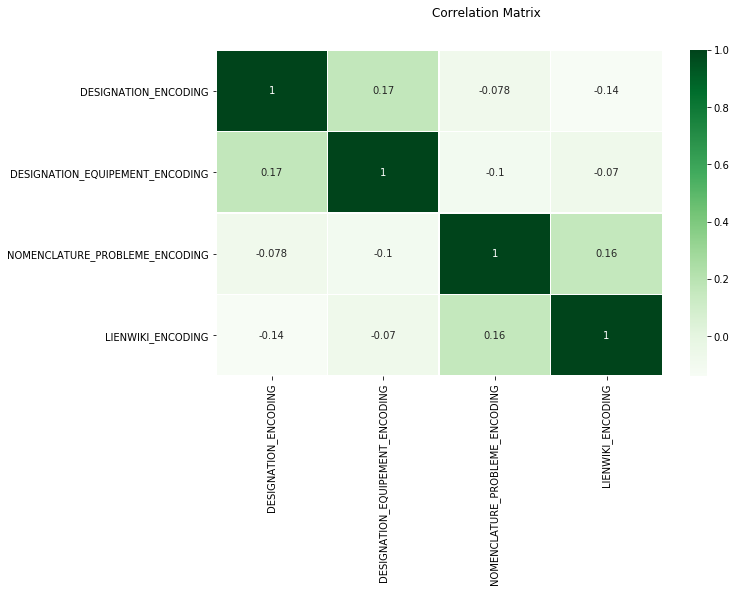

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Correlation Matrix')
sns.heatmap(training_data_result_preprocessing.corr(), annot=True, cmap="Greens", linewidths=.5, ax=ax);

## Text Encoder

### Tf IDF

In [23]:
X_train, X_val, y_train, y_val = train_test_split(training_data_result_preprocessing["ENONCE_PROBLEME_P_PROCESSING"],
                                                  training_data_result_preprocessing["LIENWIKI_ENCODING"],
                                                  test_size=0.15, random_state=42)

###### Support Vector Classification OneVsRestClassifier

In [24]:
svc_pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords.words('french'), ngram_range=(1, 2))),
                       ('nb_model', OneVsRestClassifier(SVC()))])

In [25]:
svc_pipeline.fit(X_train.values, y_train.values)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['au', 'aux', 'avec', 'ce', 'ces',
                                             'dans', 'de', 'des', 'du', 'elle...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('nb_model',
                 OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False,
                             

In [26]:
svc_prediction_result = svc_pipeline.predict(X_val.values)

In [27]:
#print('roc_auc: ', roc_auc_score(y_val.values, pred_proba))
print('accuracy: ', accuracy_score(y_val.values, svc_prediction_result))
print("f1 Score weighted : ",f1_score(y_val.values, svc_prediction_result, average='weighted'))
print("f1 Score micro : ",f1_score(y_val.values, svc_prediction_result, average='micro'))
print("f1 Score macro : ",f1_score(y_val.values, svc_prediction_result, average='macro'))

print('confusion matrices: ')
print(multilabel_confusion_matrix(y_val.values, svc_prediction_result))
print('classification_report: ')
print(classification_report(y_val.values, svc_prediction_result))

accuracy:  0.9074899214937407
f1 Score weighted :  0.9020211079537398
f1 Score micro :  0.9074899214937407
f1 Score macro :  0.8569584360276499
confusion matrices: 
[[[4575    3]
  [  28  107]]

 [[4623    3]
  [   2   85]]

 [[4642    2]
  [  12   57]]

 [[4391   11]
  [  15  296]]

 [[4410    2]
  [   6  295]]

 [[4565    0]
  [   0  148]]

 [[4444    3]
  [   2  264]]

 [[4528   27]
  [   7  151]]

 [[4651    1]
  [  54    7]]

 [[4543   47]
  [  20  103]]

 [[4447   31]
  [  48  187]]

 [[4582    7]
  [  28   96]]

 [[4513   18]
  [   9  173]]

 [[4557   15]
  [   7  134]]

 [[4602   15]
  [  12   84]]

 [[4564   30]
  [   6  113]]

 [[4407   81]
  [  22  203]]

 [[4520   12]
  [  52  129]]

 [[4583   16]
  [  13  101]]

 [[4624    4]
  [   1   84]]

 [[4634    4]
  [   2   73]]

 [[4442    3]
  [   0  268]]

 [[4500    9]
  [   4  200]]

 [[4393    3]
  [   4  313]]

 [[4599   17]
  [   3   94]]

 [[4627   10]
  [  19   57]]

 [[4591   14]
  [   6  102]]

 [[4636    5]
  [   4   6

###### Logistic Regression Classification OneVsRestClassifier

In [28]:
logistic_regression_pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords.words('french'), ngram_range=(1, 2))),
                       ('nb_model', OneVsRestClassifier(LogisticRegression(C=10)))])

In [29]:
logistic_regression_pipeline.fit(X_train.values, y_train.values)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['au', 'aux', 'avec', 'ce', 'ces',
                                             'dans', 'de', 'des', 'du', 'elle...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('nb_model',
                 OneVsRestClassifier(estimator=LogisticRegression(C=10,
                                                                  class_weight=None,
                

In [30]:
logistic_regression_prediction_result = logistic_regression_pipeline.predict(X_val.values)

In [31]:
#print('roc_auc: ', roc_auc_score(y_val.values, pred_proba))
print('accuracy: ', accuracy_score(y_val.values, logistic_regression_prediction_result))
print("f1 Score weighted : ",f1_score(y_val.values, logistic_regression_prediction_result, average='weighted'))
print("f1 Score micro : ",f1_score(y_val.values, logistic_regression_prediction_result, average='micro'))
print("f1 Score macro : ",f1_score(y_val.values, logistic_regression_prediction_result, average='macro'))

print('confusion matrices: ')
print(multilabel_confusion_matrix(y_val.values, logistic_regression_prediction_result))
print('classification_report: ')
print(classification_report(y_val.values, logistic_regression_prediction_result))

accuracy:  0.9138552938680247
f1 Score weighted :  0.9093248971578115
f1 Score micro :  0.9138552938680247
f1 Score macro :  0.869596600419048
confusion matrices: 
[[[4574    4]
  [  23  112]]

 [[4624    2]
  [   3   84]]

 [[4642    2]
  [  10   59]]

 [[4390   12]
  [  16  295]]

 [[4411    1]
  [   9  292]]

 [[4565    0]
  [   0  148]]

 [[4444    3]
  [   2  264]]

 [[4533   22]
  [  12  146]]

 [[4651    1]
  [  52    9]]

 [[4543   47]
  [  18  105]]

 [[4436   42]
  [  42  193]]

 [[4582    7]
  [  22  102]]

 [[4513   18]
  [   8  174]]

 [[4564    8]
  [   7  134]]

 [[4605   12]
  [  10   86]]

 [[4569   25]
  [   5  114]]

 [[4422   66]
  [  25  200]]

 [[4510   22]
  [  37  144]]

 [[4583   16]
  [  11  103]]

 [[4625    3]
  [   1   84]]

 [[4635    3]
  [   1   74]]

 [[4443    2]
  [   0  268]]

 [[4499   10]
  [   6  198]]

 [[4394    2]
  [   5  312]]

 [[4601   15]
  [   3   94]]

 [[4626   11]
  [  17   59]]

 [[4593   12]
  [   8  100]]

 [[4638    3]
  [   4   68

##### XGB BOOST CLASSIFY

In [32]:
xgb_boost_classify_pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords.words('french'), ngram_range=(1, 2))),
                       ('nb_model', OneVsRestClassifier(XGBClassifier(learning_rate =0.05, n_estimators=200, nthread=4)))])

In [33]:
xgb_boost_classify_pipeline.fit(X_train.values, y_train.values)

[10:43:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:44:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:44:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:45:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['au', 'aux', 'avec', 'ce', 'ces',
                                             'dans', 'de', 'des', 'du', 'elle...
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimato

In [34]:
xgb_boost_prediction_result = xgb_boost_classify_pipeline.predict(X_val.values)

In [35]:
#print('roc_auc: ', roc_auc_score(y_val.values, pred_proba))
print('accuracy: ', accuracy_score(y_val.values, xgb_boost_prediction_result))
print("f1 Score weighted : ",f1_score(y_val.values, xgb_boost_prediction_result, average='weighted'))
print("f1 Score micro : ",f1_score(y_val.values, xgb_boost_prediction_result, average='micro'))
print("f1 Score macro : ",f1_score(y_val.values, xgb_boost_prediction_result, average='macro'))

print('confusion matrices: ')
print(multilabel_confusion_matrix(y_val.values, xgb_boost_prediction_result))
print('classification_report: ')
print(classification_report(y_val.values, xgb_boost_prediction_result))

accuracy:  0.9170379800551666
f1 Score weighted :  0.9163388982571228
f1 Score micro :  0.9170379800551666
f1 Score macro :  0.8846866797139792
confusion matrices: 
[[[4571    7]
  [  13  122]]

 [[4626    0]
  [   3   84]]

 [[4643    1]
  [  11   58]]

 [[4390   12]
  [  15  296]]

 [[4409    3]
  [   5  296]]

 [[4565    0]
  [   0  148]]

 [[4444    3]
  [   1  265]]

 [[4538   17]
  [  13  145]]

 [[4631   21]
  [  30   31]]

 [[4559   31]
  [  32   91]]

 [[4450   28]
  [  34  201]]

 [[4576   13]
  [  17  107]]

 [[4510   21]
  [   9  173]]

 [[4566    6]
  [   6  135]]

 [[4602   15]
  [   8   88]]

 [[4566   28]
  [   9  110]]

 [[4424   64]
  [  36  189]]

 [[4513   19]
  [  40  141]]

 [[4587   12]
  [  10  104]]

 [[4627    1]
  [   0   85]]

 [[4635    3]
  [   1   74]]

 [[4444    1]
  [   1  267]]

 [[4502    7]
  [   5  199]]

 [[4393    3]
  [   4  313]]

 [[4601   15]
  [   8   89]]

 [[4629    8]
  [  24   52]]

 [[4592   13]
  [  10   98]]

 [[4636    5]
  [   4   6

### Bag of Word

In [36]:
X_train, X_val, y_train, y_val = train_test_split(training_data_result_preprocessing["ENONCE_PROBLEME_P_PROCESSING"],
                                                  training_data_result_preprocessing["LIENWIKI_ENCODING"],
                                                  test_size=0.15, random_state=42)

###### Logistic Regression Classification OneVsRestClassifier

In [37]:
logistic_regression_bag_word_pipeline = Pipeline([('tfidf', CountVectorizer(stop_words=stopwords.words('french'), ngram_range=(1, 2))),
                       ('nb_model', OneVsRestClassifier(LogisticRegression(C=100)))])

In [38]:
logistic_regression_bag_word_pipeline.fit(X_train.values, y_train.values)

Pipeline(memory=None,
         steps=[('tfidf',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=['au', 'aux', 'avec', 'ce', 'ces',
                                             'dans', 'de', 'des', 'du', 'elle',
                                             'en', 'et', 'eux', 'il', 'ils'...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb_model',
                 OneVsRestClassifier(estimator=LogisticRegression(C=100,
                                                                

In [39]:
logistic_regression_bag_word_prediction_result = logistic_regression_bag_word_pipeline.predict(X_val.values)

In [40]:
#print('roc_auc: ', roc_auc_score(y_val.values, pred_proba))
print('accuracy: ', accuracy_score(y_val.values, logistic_regression_bag_word_prediction_result))
print("f1 Score weighted : ",f1_score(y_val.values, logistic_regression_bag_word_prediction_result, average='weighted'))
print("f1 Score micro : ",f1_score(y_val.values, logistic_regression_bag_word_prediction_result, average='micro'))
print("f1 Score macro : ",f1_score(y_val.values, logistic_regression_bag_word_prediction_result, average='macro'))

print('confusion matrices: ')
print(multilabel_confusion_matrix(y_val.values, logistic_regression_bag_word_prediction_result))
print('classification_report: ')
print(classification_report(y_val.values, logistic_regression_bag_word_prediction_result))

accuracy:  0.914491831105453
f1 Score weighted :  0.9134372342273077
f1 Score micro :  0.914491831105453
f1 Score macro :  0.8831966296116727
confusion matrices: 
[[[4567   11]
  [  15  120]]

 [[4624    2]
  [   3   84]]

 [[4639    5]
  [   8   61]]

 [[4389   13]
  [  15  296]]

 [[4409    3]
  [   5  296]]

 [[4565    0]
  [   0  148]]

 [[4442    5]
  [   3  263]]

 [[4540   15]
  [  19  139]]

 [[4630   22]
  [  28   33]]

 [[4561   29]
  [  37   86]]

 [[4447   31]
  [  49  186]]

 [[4580    9]
  [  17  107]]

 [[4512   19]
  [  10  172]]

 [[4563    9]
  [   8  133]]

 [[4601   16]
  [   8   88]]

 [[4571   23]
  [   6  113]]

 [[4437   51]
  [  29  196]]

 [[4510   22]
  [  38  143]]

 [[4582   17]
  [  11  103]]

 [[4625    3]
  [   0   85]]

 [[4635    3]
  [   1   74]]

 [[4442    3]
  [   0  268]]

 [[4502    7]
  [   3  201]]

 [[4391    5]
  [   4  313]]

 [[4602   14]
  [   9   88]]

 [[4625   12]
  [  16   60]]

 [[4594   11]
  [   8  100]]

 [[4636    5]
  [   5   67]

##### XGB BOOST CLASSIFY

In [41]:
xgb_boost_classify_bag_word_pipeline = Pipeline([('bagofword', CountVectorizer(stop_words=stopwords.words('french'), ngram_range=(1, 2))),
                       ('nb_model', XGBClassifier(learning_rate =0.2, n_estimators=400, objective='multi:softmax', num_class=31, nthread=4))])

In [42]:
xgb_boost_classify_bag_word_pipeline.fit(X_train.values, y_train.values)

[10:59:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(memory=None,
         steps=[('bagofword',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=['au', 'aux', 'avec', 'ce', 'ces',
                                             'dans', 'de', 'des', 'du', 'elle',
                                             'en', 'et', 'eux', 'il', '...
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=400,
                      

In [43]:
xgb_boost_classify_bag_word_prediction_result = xgb_boost_classify_bag_word_pipeline.predict(X_val.values)

In [44]:
#print('roc_auc: ', roc_auc_score(y_val.values, pred_proba))
print('accuracy: ', accuracy_score(y_val.values, xgb_boost_classify_bag_word_prediction_result))
print("f1 Score weighted : ",f1_score(y_val.values, xgb_boost_classify_bag_word_prediction_result, average='weighted'))
print("f1 Score micro : ",f1_score(y_val.values, xgb_boost_classify_bag_word_prediction_result, average='micro'))
print("f1 Score macro : ",f1_score(y_val.values, xgb_boost_classify_bag_word_prediction_result, average='macro'))

print('confusion matrices: ')
print(multilabel_confusion_matrix(y_val.values, xgb_boost_classify_bag_word_prediction_result))
print('classification_report: ')
print(classification_report(y_val.values, prediction_result))

accuracy:  0.9240398896668789
f1 Score weighted :  0.9233591306259249
f1 Score micro :  0.9240398896668789
f1 Score macro :  0.8921858322848377
confusion matrices: 
[[[4572    6]
  [  10  125]]

 [[4624    2]
  [   2   85]]

 [[4643    1]
  [   8   61]]

 [[4389   13]
  [  13  298]]

 [[4410    2]
  [   7  294]]

 [[4565    0]
  [   0  148]]

 [[4444    3]
  [   3  263]]

 [[4540   15]
  [  12  146]]

 [[4630   22]
  [  28   33]]

 [[4556   34]
  [  32   91]]

 [[4455   23]
  [  37  198]]

 [[4578   11]
  [  15  109]]

 [[4515   16]
  [   7  175]]

 [[4567    5]
  [   9  132]]

 [[4606   11]
  [   7   89]]

 [[4572   22]
  [   8  111]]

 [[4437   51]
  [  28  197]]

 [[4507   25]
  [  33  148]]

 [[4589   10]
  [  13  101]]

 [[4628    0]
  [   0   85]]

 [[4634    4]
  [   0   75]]

 [[4442    3]
  [   0  268]]

 [[4502    7]
  [   4  200]]

 [[4392    4]
  [   4  313]]

 [[4604   12]
  [   6   91]]

 [[4628    9]
  [  18   58]]

 [[4596    9]
  [   6  102]]

 [[4635    6]
  [   5   6

NameError: name 'prediction_result' is not defined

## Last Training All Data

In [56]:
train_data = pd.read_csv(nameCsvFile, sep=';')

In [57]:
encoderOrdinal = OrdinalEncoder()

training_data_without_useless_column = train_data[["ENONCE_PROBLEME_P", "NOMENCLATURE_PROBLEME", "DESIGNATION_EQUIPEMENT", "DESIGNATION", "LIENWIKI"]]
training_data_without_useless_column['LIENWIKI'] = training_data_without_useless_column['LIENWIKI'].replace(np.nan, anomalieValues)
training_data_without_useless_column['DESIGNATION_EQUIPEMENT'] = training_data_without_useless_column['DESIGNATION_EQUIPEMENT'].replace(np.nan, designationProduitDefault)

#LIENWIKI
training_data_without_useless_column["LIENWIKI_ENCODING"] = encoderOrdinal.fit_transform(training_data_without_useless_column[["LIENWIKI"]])

#DESIGNATION
training_data_without_useless_column["DESIGNATION_ENCODING"] = encoderOrdinal.fit_transform(training_data_without_useless_column[["DESIGNATION"]])

#DESIGNATION_EQUIPEMENT
training_data_without_useless_column["DESIGNATION_EQUIPEMENT_ENCODING"] = encoderOrdinal.fit_transform(training_data_without_useless_column[["DESIGNATION_EQUIPEMENT"]])

#NOMENCLATURE_PROBLEME
training_data_without_useless_column["NOMENCLATURE_PROBLEME_ENCODING"] = encoderOrdinal.fit_transform(training_data_without_useless_column[["NOMENCLATURE_PROBLEME"]])

#ENONCE_PROBLEME_P_PROCESSING
training_data_without_useless_column["ENONCE_PROBLEME_P_PROCESSING"] = training_data_without_useless_column["ENONCE_PROBLEME_P"]

encoding_lien_wiki = dict()
encoding_designation = dict()
encoding_designation_equipement = dict()
encoding_nomenclature_problem = dict()

for k in range(training_data_without_useless_column.shape[0]):
    encoding_lien_wiki[str(int(training_data_without_useless_column["LIENWIKI_ENCODING"].iloc[k]))] = training_data_without_useless_column["LIENWIKI"].iloc[k]
    training_data_without_useless_column["LIENWIKI_ENCODING"].iloc[k] = int(training_data_without_useless_column["LIENWIKI_ENCODING"].iloc[k])
    
    encoding_designation[str(int(training_data_without_useless_column["DESIGNATION_ENCODING"].iloc[k]))] = training_data_without_useless_column["DESIGNATION"].iloc[k]
    training_data_without_useless_column["DESIGNATION_ENCODING"].iloc[k] = int(training_data_without_useless_column["DESIGNATION_ENCODING"].iloc[k])
    
    encoding_designation_equipement[str(int(training_data_without_useless_column["DESIGNATION_EQUIPEMENT_ENCODING"].iloc[k]))] = training_data_without_useless_column["DESIGNATION_EQUIPEMENT"].iloc[k]
    training_data_without_useless_column["DESIGNATION_EQUIPEMENT_ENCODING"].iloc[k] = int(training_data_without_useless_column["DESIGNATION_EQUIPEMENT_ENCODING"].iloc[k])
    
    encoding_nomenclature_problem[str(int(training_data_without_useless_column["NOMENCLATURE_PROBLEME_ENCODING"].iloc[k]))] = training_data_without_useless_column["NOMENCLATURE_PROBLEME"].iloc[k]
    training_data_without_useless_column["NOMENCLATURE_PROBLEME_ENCODING"].iloc[k] = int(training_data_without_useless_column["NOMENCLATURE_PROBLEME_ENCODING"].iloc[k])
    
    training_data_without_useless_column["ENONCE_PROBLEME_P_PROCESSING"].iloc[k] = training_data_without_useless_column["ENONCE_PROBLEME_P"].iloc[k].replace("description de l'incident:", "").replace("description de l'incident :", "").replace("  *", "\n").replace("*", "").replace("lien wiki utilisé:", "").replace("lien wiki utilisé", "")
    
putDataInFileJson(encoding_lien_wiki, nameEncodingLienWiki)
putDataInFileJson(encoding_designation, nameEncodingDesignation)
putDataInFileJson(encoding_designation_equipement, nameEncodingDesignationEquipement)
putDataInFileJson(encoding_nomenclature_problem, nameEncodingNomenclatureProblem)

'FINISH'

In [58]:
training_data_result_preprocessing = training_data_without_useless_column[["ENONCE_PROBLEME_P_PROCESSING", "DESIGNATION_ENCODING", "DESIGNATION_EQUIPEMENT_ENCODING", "NOMENCLATURE_PROBLEME_ENCODING", "LIENWIKI_ENCODING"]]

In [59]:
X_train = training_data_result_preprocessing["ENONCE_PROBLEME_P_PROCESSING"]
y_train = training_data_result_preprocessing["LIENWIKI_ENCODING"]

#### Xgb Boost Classify Bag of Word

In [62]:
xgb_boost_classify_bag_word_last_pipeline = Pipeline([('bagofword', CountVectorizer(stop_words=stopwords.words('french'), ngram_range=(1, 2))),
                       ('nb_model', XGBClassifier(learning_rate =0.2, n_estimators=251, objective='multi:softmax', num_class=31, nthread=4))])

In [63]:
xgb_boost_classify_bag_word_last_pipeline.fit(X_train.values, y_train.values)

[11:30:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(memory=None,
         steps=[('bagofword',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=['au', 'aux', 'avec', 'ce', 'ces',
                                             'dans', 'de', 'des', 'du', 'elle',
                                             'en', 'et', 'eux', 'il', '...
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=251,
                      

#### xgb boost classify tfidf

In [64]:
xgb_boost_classify_tfidf_last_pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords.words('french'), ngram_range=(1, 2))),
                       ('nb_model', XGBClassifier(learning_rate =0.2, n_estimators=251, nthread=4))])

In [65]:
xgb_boost_classify_tfidf_last_pipeline.fit(X_train.values, y_train.values)

[11:35:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['au', 'aux', 'avec', 'ce', 'ces',
                                             'dans', 'de', 'des', 'du', 'elle...
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=251,
                               n_jobs

#### logistic regression 

In [66]:
logistic_regression_bag_word_last_pipeline = Pipeline([('tfidf', CountVectorizer(stop_words=stopwords.words('french'), ngram_range=(1, 2))),
                       ('nb_model', OneVsRestClassifier(LogisticRegression(C=100)))])

In [ ]:
logistic_regression_bag_word_last_pipeline.fit(X_train.values, y_train.values)

#### Final Prediction

In [149]:
nameCsvFilePrediction = "testData.csv"
validation_data = pd.read_csv(nameCsvFilePrediction, sep=';')

In [163]:
encoderOrdinal = OrdinalEncoder()

training_data_without_useless_column = validation_data[["ENONCE_PROBLEME_P", "NOMENCLATURE_PROBLEME", "DESIGNATION_EQUIPEMENT", "DESIGNATION", "LIENWIKI"]]
training_data_without_useless_column['LIENWIKI'] = training_data_without_useless_column['LIENWIKI'].replace(np.nan, anomalieValues)
training_data_without_useless_column['DESIGNATION_EQUIPEMENT'] = training_data_without_useless_column['DESIGNATION_EQUIPEMENT'].replace(np.nan, designationProduitDefault)

#LIENWIKI
training_data_without_useless_column["LIENWIKI_ENCODING"] = encoderOrdinal.fit_transform(training_data_without_useless_column[["LIENWIKI"]])

#DESIGNATION
#training_data_without_useless_column["DESIGNATION_ENCODING"] = encoderOrdinal.fit_transform(training_data_without_useless_column[["DESIGNATION"]])

#DESIGNATION_EQUIPEMENT
#training_data_without_useless_column["DESIGNATION_EQUIPEMENT_ENCODING"] = encoderOrdinal.fit_transform(training_data_without_useless_column[["DESIGNATION_EQUIPEMENT"]])

#NOMENCLATURE_PROBLEME
#training_data_without_useless_column["NOMENCLATURE_PROBLEME_ENCODING"] = encoderOrdinal.fit_transform(training_data_without_useless_column[["NOMENCLATURE_PROBLEME"]])

#ENONCE_PROBLEME_P_PROCESSING
training_data_without_useless_column["ENONCE_PROBLEME_P_PROCESSING"] = training_data_without_useless_column["ENONCE_PROBLEME_P"]

encoding_lien_wiki = dict()
encoding_designation = dict()
encoding_designation_equipement = dict()
encoding_nomenclature_problem = dict()

for k in range(training_data_without_useless_column.shape[0]):
    encoding_lien_wiki[str(int(training_data_without_useless_column["LIENWIKI_ENCODING"].iloc[k]))] = training_data_without_useless_column["LIENWIKI"].iloc[k]
    training_data_without_useless_column["LIENWIKI_ENCODING"].iloc[k] = int(training_data_without_useless_column["LIENWIKI_ENCODING"].iloc[k])
    
    #encoding_designation[str(int(training_data_without_useless_column["DESIGNATION_ENCODING"].iloc[k]))] = training_data_without_useless_column["DESIGNATION"].iloc[k]
    #training_data_without_useless_column["DESIGNATION_ENCODING"].iloc[k] = int(training_data_without_useless_column["DESIGNATION_ENCODING"].iloc[k])
    
    #encoding_designation_equipement[str(int(training_data_without_useless_column["DESIGNATION_EQUIPEMENT_ENCODING"].iloc[k]))] = training_data_without_useless_column["DESIGNATION_EQUIPEMENT"].iloc[k]
    #training_data_without_useless_column["DESIGNATION_EQUIPEMENT_ENCODING"].iloc[k] = int(training_data_without_useless_column["DESIGNATION_EQUIPEMENT_ENCODING"].iloc[k])
    
    #encoding_nomenclature_problem[str(int(training_data_without_useless_column["NOMENCLATURE_PROBLEME_ENCODING"].iloc[k]))] = training_data_without_useless_column["NOMENCLATURE_PROBLEME"].iloc[k]
    #training_data_without_useless_column["NOMENCLATURE_PROBLEME_ENCODING"].iloc[k] = int(training_data_without_useless_column["NOMENCLATURE_PROBLEME_ENCODING"].iloc[k])
    
    training_data_without_useless_column["ENONCE_PROBLEME_P_PROCESSING"].iloc[k] = str(training_data_without_useless_column["ENONCE_PROBLEME_P"].iloc[k]).replace("description de l'incident:", "").replace("description de l'incident :", "").replace("  *", "\n").replace("*", "").replace("lien wiki utilisé:", "").replace("lien wiki utilisé", "")
    
#putDataInFileJson(encoding_lien_wiki, nameEncodingLienWiki)
#putDataInFileJson(encoding_designation, nameEncodingDesignation)
#putDataInFileJson(encoding_designation_equipement, nameEncodingDesignationEquipement)
#putDataInFileJson(encoding_nomenclature_problem, nameEncodingNomenclatureProblem)

In [164]:
training_data_without_useless_column

,ENONCE_PROBLEME_P,NOMENCLATURE_PROBLEME,DESIGNATION_EQUIPEMENT,DESIGNATION,LIENWIKI,LIENWIKI_ENCODING,ENONCE_PROBLEME_P_PROCESSING
0,description de l'incident:l'user signale que q...,"Acces, Comptes",OPTIPLEX 3020SFF,#ADMINISTRATION/COMPTE/REINITIALISATION MOT DE...,/wikisup/base%20de%20connaissance%20support/co...,2.0,l'user signale que quand il reset mdp deltanet...
1,description de l'incident :le capot arriere du...,Telephonie,DESIGNATION_EQUIPEMENT,#MATERIEL/TELEPHONIE/CISCO WIFI,/wikisup/base%20de%20connaissance%20support/su...,27.0,"le capot arriere du telephone ne tient plus, e..."
2,description de l'incident :l'utilisateur nous ...,Pb fonctionnalites telephoniques,Désignation nulle,#MATERIEL/TELEPHONIE/CISCO WIFI,/wikisup/base%20de%20connaissance%20support/su...,27.0,l'utilisateur nous appelle car son cisco wifi ...
3,description de l'incident : l'utilisateur me s...,ToIP,LENOVO THINKCENTRE M700,#MATERIEL/TELEPHONIE/IP,/wikisup/base%20de%20connaissance%20support/su...,27.0,l'utilisateur me signal que la batterie de so...
4,description de l'incident : l'utilisateur a me...,ToIP,Désignation nulle,#MATERIEL/TELEPHONIE/CISCO WIFI,/wikisup/base%20de%20connaissance%20support/su...,27.0,l'utilisateur a me signal que les communicati...
...,...,...,...,...,...,...,...
13536,description de l'incident : demande de dever...,Verrouille,TABLETTE HP X2 612,Administration/Gestion des acces/RMDP/Compte @...,/wikisup/base%20de%20connaissance%20support/ro...,21.0,demande de deverrouillage du compte @ acti...
13537,description de l'incident : l'utilisateur sign...,Dysfonctionnement,PORTABLE LENOVO THINKPAD T460S,materiel/poste de travail/pc fixe/dysfonctionn...,/wikisup/base%20de%20connaissance%20support/po...,17.0,l'utilisateur signale qu'il a un message d'er...
13538,description de l'incident : la clef gemalto de...,Cle Gemalto,PORTABLE DELL LATITUDE 7400,Materiel/Peripherique/Cle Gemalto/Code PIN,/wikisup/base%20de%20connaissance%20support/ge...,6.0,la clef gemalto de l'utilisateur est verrouil...
13539,description de l'incident : demande de dever...,Mot de passe,STATION HP Z240 TWR,Administration/Gestion des acces/RMDP/Compte @,/wikisup/base%20de%20connaissance%20support/ro...,21.0,"demande de deverrouillage compte @, action..."


In [147]:
#nameCsvFilePrediction = "testData.csv"
#validation_data = pd.read_csv(nameCsvFilePrediction, sep=';')

In [165]:
result_finale_top1, result_finale_top3, link_predict = mixted_model_result(xgb_boost_classify_bag_word_last_pipeline, xgb_boost_classify_tfidf_last_pipeline, logistic_regression_bag_word_last_pipeline, training_data_without_useless_column, encoding_lien_wiki)

In [175]:
#print('roc_auc: ', roc_auc_score(y_val.values, pred_proba))
real_value = training_data_without_useless_column["LIENWIKI_ENCODING"].values
predict_values = result_finale_top1
print('accuracy: ', accuracy_score(real_value, predict_values))
print("f1 Score weighted : ",f1_score(real_value, predict_values, average='weighted'))
print("f1 Score micro : ",f1_score(real_value, predict_values, average='micro'))
#print("f1 Score macro : ",f1_score(real_value, predict_values, average='macro'))

print('confusion matrices: ')
print(multilabel_confusion_matrix(real_value, predict_values))
print('classification_report: ')
print(classification_report(real_value, predict_values))

accuracy:  0.926814858577653
f1 Score weighted :  0.9264541380037222
f1 Score micro :  0.926814858577653
confusion matrices: 
[[[13156    13]
  [   41   331]]

 [[13307    14]
  [    6   214]]

 [[13353     6]
  [   22   160]]

 [[12640    29]
  [   27   845]]

 [[12788     7]
  [    8   738]]

 [[13096     2]
  [    3   440]]

 [[12793     7]
  [    9   732]]

 [[13046    38]
  [   22   435]]

 [[13267    97]
  [   85    92]]

 [[13062    90]
  [  109   280]]

 [[12814    70]
  [   93   564]]

 [[13104    44]
  [   53   340]]

 [[12883    33]
  [   25   600]]

 [[13131    16]
  [   23   371]]

 [[13220    34]
  [   29   258]]

 [[13125    72]
  [   30   314]]

 [[12773   118]
  [   74   576]]

 [[13041    67]
  [   80   353]]

 [[13195    27]
  [   23   296]]

 [[13284     5]
  [    4   248]]

 [[13322     1]
  [    5   213]]

 [[12647     3]
  [    5   886]]

 [[12970    11]
  [   21   539]]

 [[12630     9]
  [    3   899]]

 [[13227    37]
  [   21   256]]

 [[13324    24]
  [   38

In [170]:
result_finale_top3

[[14.0, 10.0, 6.0],
 [27.0, 27.0, 27.0],
 [27.0, 27.0, 27.0],
 [27.0, 27.0, 27.0],
 [27.0, 27.0, 27.0],
 [27.0, 27.0, 27.0],
 [27.0, 27.0, 27.0],
 [27.0, 27.0, 27.0],
 [27.0, 27.0, 27.0],
 [10.0, 24.0, 30.0],
 [14.0, 14.0, 14.0],
 [27.0, 27.0, 27.0],
 [27.0, 27.0, 27.0],
 [27.0, 27.0, 27.0],
 [27.0, 27.0, 27.0],
 [27.0, 27.0, 27.0],
 [27.0, 27.0, 27.0],
 [27.0, 27.0, 27.0],
 [2.0, 2.0, 2.0],
 [27.0, 12.0, 27.0],
 [12.0, 12.0, 12.0],
 [2.0, 2.0, 2.0],
 [2.0, 2.0, 2.0],
 [26.0, 26.0, 26.0],
 [2.0, 2.0, 2.0],
 [15.0, 15.0, 15.0],
 [27.0, 27.0, 27.0],
 [2.0, 12.0, 2.0],
 [26.0, 26.0, 26.0],
 [22.0, 22.0, 22.0],
 [12.0, 12.0, 12.0],
 [12.0, 12.0, 12.0],
 [2.0, 2.0, 2.0],
 [22.0, 22.0, 22.0],
 [22.0, 22.0, 22.0],
 [15.0, 15.0, 15.0],
 [12.0, 12.0, 14.0],
 [22.0, 22.0, 22.0],
 [12.0, 12.0, 12.0],
 [27.0, 27.0, 27.0],
 [22.0, 22.0, 22.0],
 [27.0, 27.0, 27.0],
 [12.0, 12.0, 12.0],
 [15.0, 15.0, 15.0],
 [2.0, 12.0, 12.0],
 [2.0, 2.0, 2.0],
 [26.0, 26.0, 26.0],
 [26.0, 26.0, 26.0],
 [14.0, 14.0, 

In [180]:
predict_top_3 = []
p = 0

for k in real_value:
    if(k in result_finale_top3[p]):
        predict_top_3.append(k)
    else:
        predict_top_3.append(100)
    p+=1

In [181]:
#print('roc_auc: ', roc_auc_score(y_val.values, pred_proba))
real_value = training_data_without_useless_column["LIENWIKI_ENCODING"].values
predict_values = predict_top_3
print('accuracy: ', accuracy_score(real_value, predict_values))
print("f1 Score weighted : ",f1_score(real_value, predict_values, average='weighted'))
print("f1 Score micro : ",f1_score(real_value, predict_values, average='micro'))
#print("f1 Score macro : ",f1_score(real_value, predict_values, average='macro'))

print('confusion matrices: ')
print(multilabel_confusion_matrix(real_value, predict_values))
print('classification_report: ')
print(classification_report(real_value, predict_values))

accuracy:  0.9500775422790045
f1 Score weighted :  0.972791467920771
f1 Score micro :  0.9500775422790045
confusion matrices: 
[[[13169     0]
  [   25   347]]

 [[13321     0]
  [    1   219]]

 [[13359     0]
  [   16   166]]

 [[12669     0]
  [   18   854]]

 [[12795     0]
  [    7   739]]

 [[13098     0]
  [    2   441]]

 [[12800     0]
  [    6   735]]

 [[13084     0]
  [   14   443]]

 [[13364     0]
  [   67   110]]

 [[13152     0]
  [   93   296]]

 [[12884     0]
  [   62   595]]

 [[13148     0]
  [   40   353]]

 [[12916     0]
  [   17   608]]

 [[13147     0]
  [   13   381]]

 [[13254     0]
  [   19   268]]

 [[13197     0]
  [   17   327]]

 [[12891     0]
  [   46   604]]

 [[13108     0]
  [   50   383]]

 [[13222     0]
  [   11   308]]

 [[13289     0]
  [    3   249]]

 [[13323     0]
  [    4   214]]

 [[12650     0]
  [    4   887]]

 [[12981     0]
  [   15   545]]

 [[12639     0]
  [    3   899]]

 [[13264     0]
  [   10   267]]

 [[13348     0]
  [   2